In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

In [185]:
df_water = pd.read_csv('./water_usage.csv')
df_water.drop(['unit'], axis=1, inplace=True)
df_water.head()
A = np.sum(df_water['Total'])/1e3
lamb = 0.1

df_elec = pd.read_csv('./elec_usage.csv')
B = np.sum(df_elec['Elec Consumption(in billion kwh)'])/365
print(B)### calculate the average daily electricity consumption


1.8383986912054793


In [186]:
df = pd.read_csv('./dam_elec_water.csv')
elecG = df['elecG']
elecH = df['elecH']
waterG = df['waterG']
levelG = df['levelG']
waterH = df['waterH']
levelH = df['levelH']

def water_convert(water):
    water = water * 325851.429 / 1e9
    return water

waterG = water_convert(waterG)
print(waterG)

waterH = water_convert(waterH)
print(waterH)


0     6258.293422
1     5144.958799
2     4082.292771
3     3241.349740
4     3438.334749
5     3859.079980
6     3905.025031
7     4253.540405
8     4728.136820
9     4794.495812
10    5091.060692
11    4805.587469
12    3703.563801
13    3653.422435
14    3880.165826
15    3985.701935
16    4401.122101
17    3969.379385
18    3768.026337
19    3836.600141
20    2663.360341
Name: waterG, dtype: float64
0     6821.951875
1     5877.500183
2     5225.788853
3     4738.274384
4     5012.159679
5     4734.942879
6     4280.740201
7     4061.660510
8     3743.787553
9     3505.916662
10    3935.317158
11    4496.227055
12    4140.150625
13    3565.011773
14    3281.733485
15    3188.387804
16    3345.691604
17    3305.455795
18    3411.662832
19    3505.546494
20    3106.178747
Name: waterH, dtype: float64


In [187]:
from sympy import *
def ln_fitting(X, Y): ### Y = a * ln X + b
    ### the type of X and Y should be np.array
    a = Symbol('a')
    b = Symbol('b')
    poly1 = a * np.sum(np.square(np.log(X))) + b * np.sum(np.log(X)) - np.sum(np.log(X) * Y) 
    poly2 = a * np.sum(np.log(X)) + b * len(X) - np.sum(Y)
    a, b =  list(solve([poly1, poly2], [a, b]).values())[0], list(solve([poly1, poly2], [a, b]).values())[1]
    return a, b


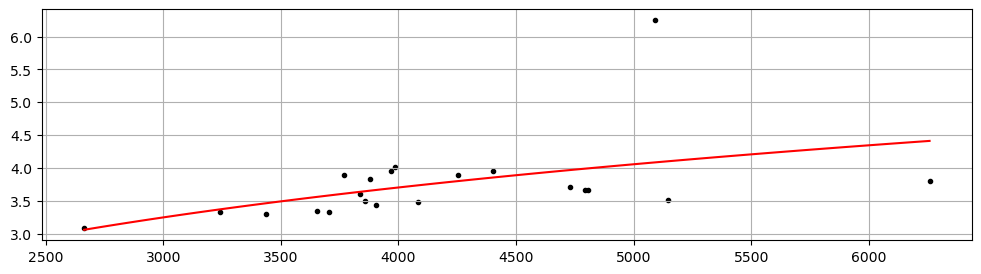

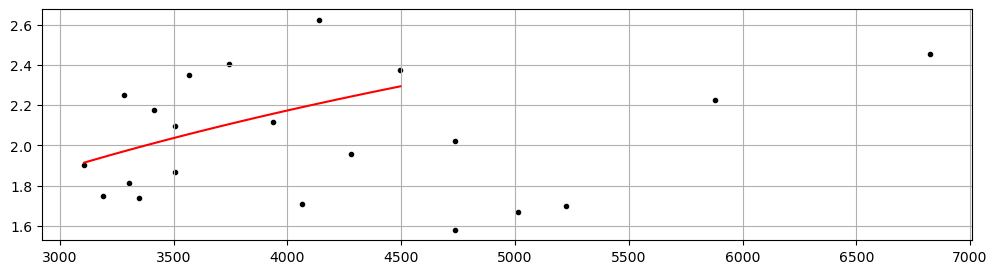

In [188]:
# elec = a * water + b
fig = plt.figure(figsize =(12,3))
plt.scatter(waterG,elecG,marker = '.',color = 'k')
plt.grid(True)
data_g, data_h, data_elec_g, data_elec_h = waterG.to_numpy(), waterH[waterH < 4500].to_numpy(), elecG.to_numpy(), elecH[waterH < 4500].to_numpy()
a_G, b_G = ln_fitting(data_g, data_elec_g)

### plot the fitting curve
x = np.linspace(min(data_g), max(data_g), 100)
y = a_G * np.log(x) + b_G
plt.plot(x, y, color = 'r')

fig = plt.figure(figsize =(12,3))
plt.scatter(waterH,elecH,marker = '.',color = 'k')
plt.grid(True)
a_H, b_H = ln_fitting(data_h, data_elec_h)

### plot the fitting curve
x = np.linspace(min(data_h), max(data_h), 100)
y = a_H * np.log(x) + b_H
plt.plot(x, y, color = 'r')


In [189]:
print("Fitting for dam G")
print("---------------------")
print('slope: %.4f' % a_G)
print('intercept: %.4f' % b_G)
print('The linear regression function: y = %.4f ln(x) + %.4f' %
      (a_G, b_G))

print("Fitting for dam H")
print("---------------------")
print('slope: %.4f' % a_H)
print('intercept: %.4f' % b_H)
print('The linear regression function: y = %.4f ln(x) + %.4f' %
      (a_H, b_H))


Fitting for dam G
---------------------
slope: 1.5825
intercept: -9.4220
The linear regression function: y = 1.5825 ln(x) + -9.4220
Fitting for dam H
---------------------
slope: 1.0253
intercept: -6.3298
The linear regression function: y = 1.0253 ln(x) + -6.3298


In [190]:
### here mu is the slope
mu_G = a_G
phi_G = b_G
### here mu is the slope
mu_H = a_H
phi_H = b_H

/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_46277/1075182930.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelG2waterG.fit(levelG[:,np.newaxis], waterG[:,np.newaxis])


LinearRegression()

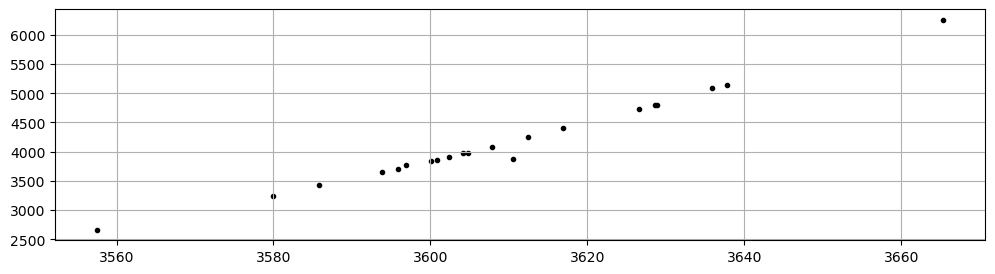

In [191]:
# water = a * level + b
fig = plt.figure(figsize =(12,3))
plt.scatter(levelG,waterG,marker = '.',color = 'k')
plt.grid(True)

levelG2waterG = linear_model.LinearRegression()
levelG2waterG.fit(levelG[:,np.newaxis], waterG[:,np.newaxis])

In [192]:
print('slope: %.4f' % levelG2waterG.coef_[0])
print('intercept: %.4f' % levelG2waterG.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

slope: 33.2911
intercept: -115988.7435
The linear regression function: y = 33.2911x + -115988.7435


In [193]:
print('The transformation from level to water volumn for dam G is: volume = %.4f * level + %.4f' %(levelG2waterG.coef_[0], levelG2waterG.intercept_))

The transformation from level to water volumn for dam G is: volume = 33.2911 * level + -115988.7435


/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_46277/1428817510.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  levelH2waterH.fit(levelH[:,np.newaxis], waterH[:,np.newaxis])


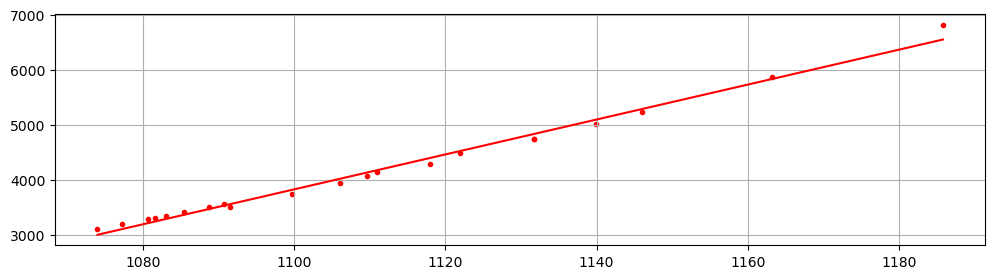

In [194]:
# water = a * level + b
fig = plt.figure(figsize =(12,3))
waterH = np.round(waterH, 0)
plt.scatter(levelH,waterH,marker = '.',color = 'r')
plt.grid(True)

levelH2waterH = linear_model.LinearRegression()
levelH2waterH.fit(levelH[:,np.newaxis], waterH[:,np.newaxis])

x = np.linspace(min(levelH), max(levelH), 100)
y = levelH2waterH.coef_[0] * x + levelH2waterH.intercept_
plt.plot(x, y, color = 'r')

In [195]:
print('slope: %.4f' % levelH2waterH.coef_[0])
print('intercept: %.4f' % levelH2waterH.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_))

slope: 31.7869
intercept: -31138.4313
The linear regression function: y = 31.7869x + -31138.4313


In [196]:
print('The transformation from level to water volumn for dam H is: volume = %.4f * level + %.4f' %(levelH2waterH.coef_[0], levelH2waterH.intercept_))

The transformation from level to water volumn for dam H is: volume = 31.7869 * level + -31138.4313


$\mathrm{H}$ 坝水位为 $\mathrm{M}, \mathrm{G}$ 坝水位是 $\mathrm{P}$，对应的水量分别为 $\mathrm{M}_v, \mathrm{P}_v$ 。假设 $\mathrm{G}$ 坝中的 $\lambda$ 比例出水会进入 $\mathrm{H}$ 坝, $\mathrm{H}$ 坝出水速率为 $x$ ， $\mathrm{G}$ 坝出水速率为 $y$. 所有单位时间水需求量是 $A=a_1+a_2+a_3+a_4+a_5$, 单位时间电需求量是 $B=b_1+b_2+b_3+b_4+b_5$, 分别为 $M_{\min v}, P_{\min v}$ ，提供电力和水量关系系数分别是 $\mu_H, \mu_G$. 两个大坝的最长持续时间是 $T$ 那么满足以下公式:
已知数据: $M, P, A, B, \mu_H, \mu_G, \lambda$ 要求: $x, y, T, M_{\min v}, P_{\min v}$
- $M_v + \lambda * y * T - x * T=M_{\min v} * T$
- $P_v -y * T=P_{\min v} * T$
- $A=x+(1-\lambda) * y$
- $B=\mu_H * ln(M_{\min v}) + \phi_H + \mu_G * ln(P_{\min v}) + \phi_G$
- $ \frac{M_v}{P_v} = \frac{M_{\min v}}{P_{\min v}} $

解为:

$$
\begin{aligned}
& r = \frac{M_v}{P_v} \\
& P_{\min v} = \mathrm e ^ {\frac{B - \mu_1 * ln(r)}{\mu_1 + \mu_2}} \\
& M_{\min v} = r * P_{\min v} \\
& T=\frac{(r+1) * P_v}{A + (r+1) * P_{\min v}}\\
& x=\frac{M_v}{T} - M_{\min v} \\
& y=A + (\lambda - 1) * x \\
\end{aligned}
$$

In [197]:
# M is dam H, P is dam G
M, P = 1074.01, 3557.57

loss_H = levelH2waterH.coef_[0]*950.0 + levelH2waterH.intercept_
loss_H = loss_H.squeeze()
loss_G = levelG2waterG.coef_[0]*3490 + levelG2waterG.intercept_
loss_G = loss_G.squeeze()
print(loss_H, loss_G)
M_v = levelH2waterH.coef_[0]*M + levelH2waterH.intercept_ - loss_H
M_v = M_v.squeeze()
P_v = levelG2waterG.coef_[0]*P + levelG2waterG.intercept_ - loss_G
P_v = P_v.squeeze()
print(M_v, P_v)
ratio = M_v/P_v
P_min = exp((B - mu_H * ln(ratio) - phi_H - phi_G)/(mu_G + mu_H))
M_min = ratio * P_min
T = (ratio+1) * P_v / (A + (ratio + 1) * P_min)
y = P_v / T - P_min
x = A + (lamb - 1) * y
print("Assume M and P is 3610.47 and 1080.68, respectively (2021 data)")
print("All the pre-known parameters known from data are:")
print("------------------------------------------------")
print("A = ", A, "with the unit of billion gallons per day")
print("B = ", B, "with the unit of billion kwh per day")
print("lambda = ", lamb)
print("mu_1 = ", mu_H)
print("phi_1 = ", phi_H)
print("mu_2 = ", mu_G)
print("phi_2 = ", phi_G)
print("\n")
print("The further calculated parameters are:")
print("------------------------------------------------")
print('M_v is : {}'.format(M_v + loss_H))
print('P_v is : {}'.format(P_v + loss_G))
print("Assume the ratio is M_v / P_v = M_min v / P_min v = {}".format(ratio))
print("M_min v is : {}".format(M_min))
print("P_min v is : {}".format(P_min))
print()
print("The final result is:")
print("------------------------------------------------")
print("x = {}".format(x))
print("y = {}".format(y))
print("T = {}".format(T))


-940.9125903639906 197.10793241368083
3941.8887345590956 2249.4779321705428
Assume M and P is 3610.47 and 1080.68, respectively (2021 data)
All the pre-known parameters known from data are:
------------------------------------------------
A =  44.26947 with the unit of billion gallons per day
B =  1.8383986912054793 with the unit of billion kwh per day
lambda =  0.1
mu_1 =  1.02529154681883
phi_1 =  -6.32984091702877
mu_2 =  1.58247868054594
phi_2 =  -9.42198213302009


The further calculated parameters are:
------------------------------------------------
M_v is : 3000.976144195105
P_v is : 2446.5858645842236
Assume the ratio is M_v / P_v = M_min v / P_min v = 1.7523571483786593
M_min v is : 1194.78418329831
P_min v is : 681.815453204710

The final result is:
------------------------------------------------
x = 29.7936876606803
y = 16.0842025992441
T = 3.22321112134556


In [198]:
(B - mu_H * ln(ratio) - 15)/(mu_G + mu_H)

-5.26762311357985

slope: 1.1370
intercept: -4.4675
The linear regression function: y = 1.1370 lnx + -4.4675


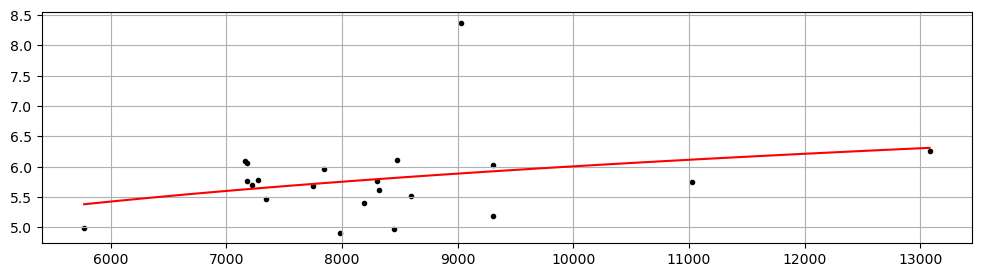

In [199]:
### add on Jan 12
fig = plt.figure(figsize =(12,3))
plt.scatter(waterG+waterH, elecG+elecH ,marker = '.',color = 'k')
plt.grid(True)
# elec = a * water + b
data = np.array([waterG+waterH, elecG+elecH])
a, b = ln_fitting(data[0], data[1])
### plot the fitting line
x = np.linspace(min(data[0]), max(data[0]), 100)
y = a * np.log(x) + b
plt.plot(x, y, 'r')

print('slope: %.4f' % a)
print('intercept: %.4f' % b)
print('The linear regression function: y = %.4f lnx + %.4f' %(a, b))
### 
